# 생능출판사 "따라하며 배우는 파이썬과 데이터과학" 코드 15장
## chapter 15
### 딥러닝의 맛을 보자

### 15.5 가장 인기있는 기계학습과 딥러닝 플랫폼 : 텐서플로

In [2]:
import tensorflow as tf # tensorflow의 별명은 tf로 한다 
print(tf.__version__)   # version 앞뒤로 두 개의 밑줄을 사용한다

2.15.0


### 15.6 MNIST라는 예시 데이터를 살펴보자

In [6]:
# tensorflow와 tf.keras를 임포트 
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 학습용, 테스트 데이터로 구분하여 읽어옴
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [7]:
print('train_images.shape =', train_images.shape) 
print('test_images.shape =', test_images.shape) 
print('train_labels.shape =', train_labels.shape) 
print('test_labels.shape =', test_labels.shape)

train_images.shape = (60000, 28, 28)
test_images.shape = (10000, 28, 28)
train_labels.shape = (60000,)
test_labels.shape = (10000,)


In [8]:
img = train_images[0]   # 훈련 이미지의 첫 번째 데이터를 가져온다 
for i in range(28):     # 훈련 이미지를 살펴보자
    for j in range(28): 
        print('{:4d}'.format(img[i][j]), end='')
print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0   0   0

### 15.7 MNIST 데이터와 이미지의 구조

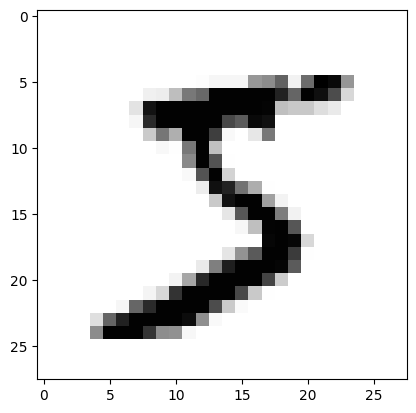

In [9]:
import matplotlib.pyplot as plt 

plt.imshow(train_images[0], cmap='Greys')

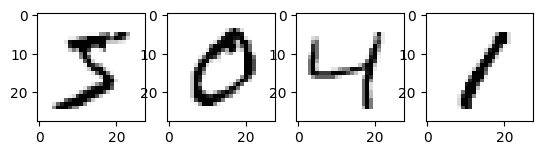

In [10]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 4, 1) 
ax2 = fig.add_subplot(1, 4, 2) 
ax3 = fig.add_subplot(1, 4, 3) 
ax4 = fig.add_subplot(1, 4, 4)

ax1.imshow(train_images[0], cmap='Greys') # 첫 번째 훈련용 데이터 
ax2.imshow(train_images[1], cmap='Greys') # 두 번째 훈련용 데이터 
ax3.imshow(train_images[2], cmap='Greys') # 세 번째 훈련용 데이터 
ax4.imshow(train_images[3], cmap='Greys') # 네 번째 훈련용 데이터

In [11]:
print('train_labels[:4] =', train_labels[:4])   # 정답 레이블을 출력해보자

train_labels[:4] = [5 0 4 1]


### 15.8 딥러닝 모델을 만드는 단계

In [12]:
# 입력값 전처리 : 0에서 255사이의 값을 0에서 1 사이의 값으로 가공함 
train_images, test_images = train_images / 255, test_images / 255

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [14]:
model.summary()     # 모델의 구조를 요약하여 살펴보자

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 15.9 딥러닝 모델을 학습시켜 보자

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 717us/step - loss: 0.2543 - accuracy: 0.9276
Epoch 2/5
1875/1875 [==============================] - 1s 690us/step - loss: 0.1115 - accuracy: 0.9665
Epoch 3/5
1875/1875 [==============================] - 1s 736us/step - loss: 0.0756 - accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 1s 777us/step - loss: 0.0576 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 1s 716us/step - loss: 0.0443 - accuracy: 0.9865


In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2) 
print('\n테스트 데이터에 대한 모델의 정확도:', test_acc)

313/313 - 0s - loss: 0.0715 - accuracy: 0.9786 - 210ms/epoch - 670us/step

테스트 데이터에 대한 모델의 정확도: 0.978600025177002


### 15.10 이미지를 예측해 보자

In [18]:
test_images.shape

(10000, 28, 28)

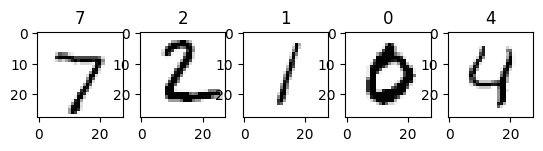

In [19]:
fig = plt.figure()

n = 5       # 5개의 테스트 데이터 
for i in range(5):
    ax = fig.add_subplot(1, n, i+1)
    ax.imshow(test_images[i], cmap='Greys')     # 테스트용 데이터 
    ax.set_title(str(test_labels[i]))           # 테스트용 데이터의 레이블

In [20]:
yhat = model.predict(test_images[0])    # 첫 번째 데이터의 예측값

ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 784, but received input with shape (None, 28)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 28), dtype=float32)
      • training=False
      • mask=None


In [21]:
test_images[0].shape

(28, 28)

In [22]:
test_images[0][np.newaxis, :, :].shape

(1, 28, 28)

In [23]:
model.predict( test_images[0][np.newaxis, :, :])

1/1 [==============================] - 0s 35ms/step


array([[1.66899063e-08, 1.08208449e-10, 1.06043144e-05, 3.18074999e-05,
        1.85906238e-11, 1.21460729e-07, 2.99221477e-13, 9.99956846e-01,
        4.38226550e-07, 1.13867756e-07]], dtype=float32)

In [24]:
for idx in range(5):
    y_pred = np.argmax(model.predict(test_images[idx][np.newaxis, :, :])) 
    print('{}번째 데이터의 예측값: {}'.format(idx, y_pred))

1/1 [==============================] - 0s 12ms/step
0번째 데이터의 예측값: 7
1/1 [==============================] - 0s 19ms/step
1번째 데이터의 예측값: 2
1/1 [==============================] - 0s 10ms/step
2번째 데이터의 예측값: 1
1/1 [==============================] - 0s 10ms/step
3번째 데이터의 예측값: 0
1/1 [==============================] - 0s 10ms/step
4번째 데이터의 예측값: 4


### 15.11 패션 MNIST라는 예시 데이터 알아보기

In [25]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터는 keras의 데이터셋에 있는데 이를 읽어와서 학습용, 테스트 데이터로 구분 
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) =  fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [26]:
print(train_images.shape)   # 학습 이미지의 형태와 레이블을 출력한다 
print(test_images.shape)    # 테스트용 이미지의 형태를 출력한다.

(60000, 28, 28)
(10000, 28, 28)


#### 패션 MNIST 데이터의 내부구조를 확인하자

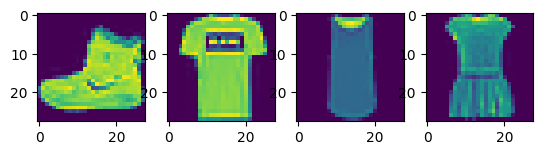

In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 4, 1) 
ax2 = fig.add_subplot(1, 4, 2) 
ax3 = fig.add_subplot(1, 4, 3) 
ax4 = fig.add_subplot(1, 4, 4) 
ax1.imshow(train_images[0])     # 첫 번째 훈련용 데이터
ax2.imshow(train_images[1])     # 두 번째 훈련용 데이터
ax3.imshow(train_images[2])     # 세 번째 훈련용 데이터
ax4.imshow(train_images[3])     # 네 번째 훈련용 데이터

In [28]:
print(train_labels[:4])     # 가장 먼저 나타나는 네 개의 레이블을 출력해본다.

[9 0 0 3]


### 15.12 다시 한번 인공 신경망을 구축해 보자

In [29]:
# 입력값 전처리 : 0에서 255사이의 값을 0에서 1 사이의 값으로 가공함 
train_images, test_images = train_images / 255, test_images / 255

In [30]:
model1 = keras.Sequential([ keras.layers.Flatten(input_shape=(28, 28)), keras.layers.Dense(128, activation='relu'), keras.layers.Dense(10, activation='softmax')])

#### 인공 신경망을 학습시켜 보자

In [31]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
model1.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 851us/step - loss: 0.5005 - accuracy: 0.8230
Epoch 2/5
1875/1875 [==============================] - 2s 881us/step - loss: 0.3745 - accuracy: 0.8634
Epoch 3/5
1875/1875 [==============================] - 2s 839us/step - loss: 0.3355 - accuracy: 0.8762
Epoch 4/5
1875/1875 [==============================] - 2s 815us/step - loss: 0.3115 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 2s 820us/step - loss: 0.2930 - accuracy: 0.8925


In [32]:
test_loss, test_acc = model1.evaluate(test_images, test_labels, verbose=2) 
print('\nmodel1의 테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.3465 - accuracy: 0.8753 - 204ms/epoch - 650us/step

model1의 테스트 정확도: 0.8752999901771545


### 15.13 학습된 신경망을 새 이미지 인식에 적용해 보자

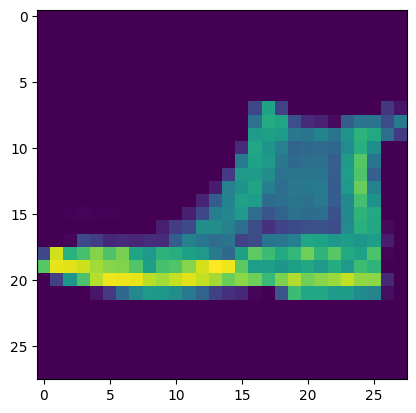

In [34]:
import numpy as np
randIdx = np.random.randint(0, 1000) 
plt.imshow(test_images[randIdx])

In [35]:
yhat = model1.predict( test_images[randIdx][np.newaxis, :, :]) 
yhat

1/1 [==============================] - 0s 27ms/step


array([[1.3131365e-04, 1.2750210e-07, 2.4818225e-06, 4.2526455e-07,
        3.4914033e-06, 5.3704649e-02, 1.0063626e-04, 1.2205574e-01,
        1.5754496e-04, 8.2384360e-01]], dtype=float32)

In [36]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
yhat = np.argmax( model1.predict( test_images[randIdx][np.newaxis, :, :]) ) 
print('데이터의 클래스 이름:', class_names[yhat])

1/1 [==============================] - 0s 11ms/step
데이터의 클래스 이름: Ankle boot


#### 딥러닝이라는 것은 무엇인가

In [37]:
model2 = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(64, activation='relu'), 
    keras.layers.Dense(32, activation='relu'), 
    keras.layers.Dense(10, activation='softmax')
]) 
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model2.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5107 - accuracy: 0.8191
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3732 - accuracy: 0.8633
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3367 - accuracy: 0.8762
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3147 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2933 - accuracy: 0.8905


### 15.14 층을 쌓아 얼마나 좋아졌는지 눈으로 확인해 보자

In [38]:
pred_1 = model.predict(test_images) 
pred_2 = model2.predict(test_images) 
pred_1, pred_2

313/313 [==============================] - 0s 469us/step


(array([[1.3465867e-11, 7.5242301e-09, 9.9983394e-01, ..., 5.9991049e-12,
         4.1773585e-09, 2.0047507e-16],
        [6.9710444e-07, 8.2862977e-07, 8.1467920e-04, ..., 7.3522699e-10,
         3.2743034e-03, 1.2936336e-09],
        [6.2784678e-01, 4.1646667e-06, 4.3624570e-03, ..., 1.0807179e-01,
         1.8193320e-04, 5.7069492e-02],
        ...,
        [1.5664216e-06, 1.8066233e-08, 1.8353380e-04, ..., 1.2858892e-05,
         1.9328812e-05, 1.4693572e-06],
        [1.5316578e-04, 3.7228869e-04, 2.1863237e-01, ..., 2.0369304e-04,
         1.7394786e-01, 7.9789024e-05],
        [2.4351951e-04, 4.4151332e-07, 8.5241127e-01, ..., 3.5711575e-06,
         1.0281674e-03, 1.2263422e-07]], dtype=float32),
 array([[3.5600343e-07, 1.7323716e-09, 4.3491823e-08, ..., 1.3998403e-02,
         7.4018811e-07, 9.8557508e-01],
        [6.1185157e-05, 1.6480760e-10, 9.8627704e-01, ..., 2.7694917e-12,
         1.4210929e-07, 1.2429876e-09],
        [1.2788385e-08, 9.9999988e-01, 1.7271252e-09, ...,

In [39]:
y_hat1 = np.argmax( pred_1, axis = 1) 
y_hat2 = np.argmax( pred_2, axis = 1) 
y_hat1, y_hat2

(array([2, 6, 0, ..., 5, 3, 2]), array([9, 2, 1, ..., 8, 1, 5]))

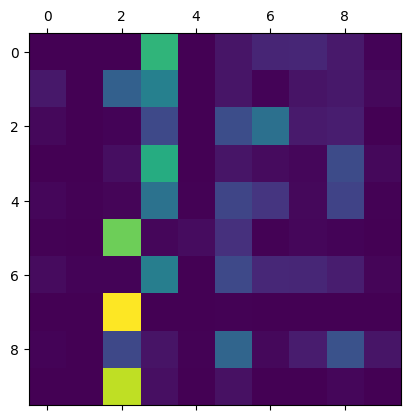

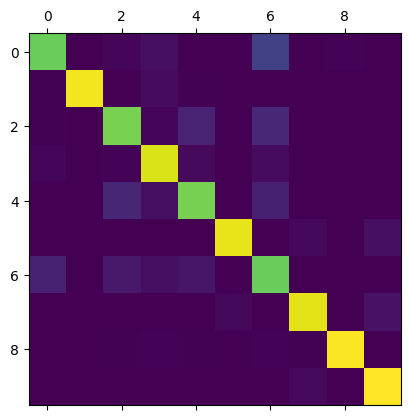

In [40]:
from sklearn.metrics import confusion_matrix 
conf_mat1 = confusion_matrix(test_labels, y_hat1) 
conf_mat2 = confusion_matrix(test_labels, y_hat2) 
plt.matshow(conf_mat1)
plt.matshow(conf_mat2)